In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid
from grokking.analysis import Run, visualise
from grokking.datasets import load
from grokking.training import equations_to_arrays

In [4]:
matplotlib.rcParams["figure.figsize"] = (6, 4)
matplotlib.rcParams["figure.facecolor"] = "white"
matplotlib.rcParams["figure.dpi"] = 150

# Grokking



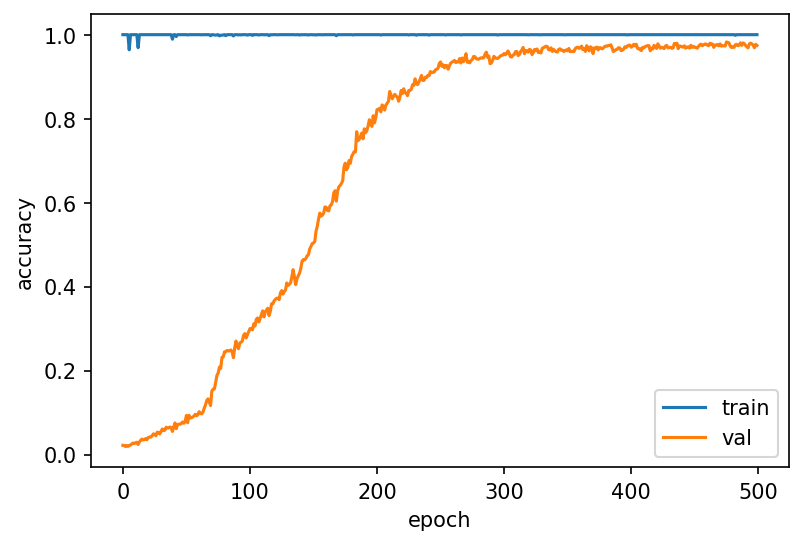

In [5]:
grokking_signature_run = Run("runs/moddiv_tf_50_w_0_220821200321/")
grokking_signature_run.learning_curves("sparse_categorical_accuracy", ylabel="accuracy")
plt.legend()

# Relevance to Model Risk

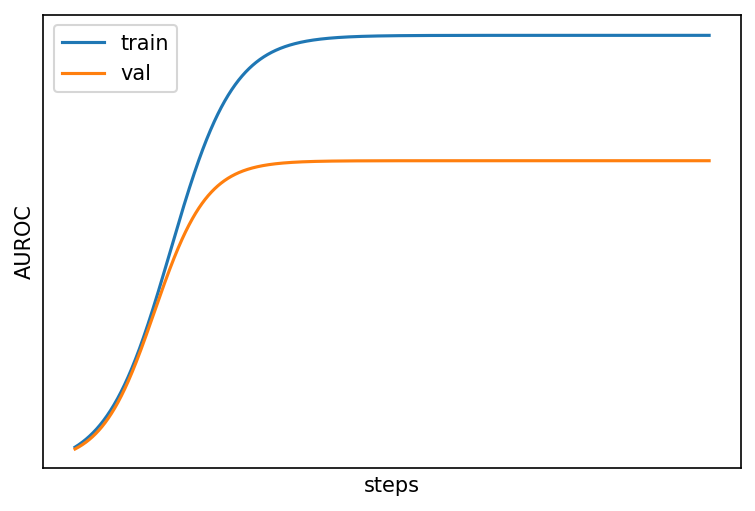

In [6]:
def plot_dummy_learning_curves(train, val):
    steps = np.arange(20, step=0.01)
    train_metrics = train(steps)
    val_metrics = val(steps)
    plt.plot(steps, train_metrics, label="train")
    plt.plot(steps, val_metrics, label="val")
    plt.ylim([0., None])
    plt.tick_params(axis="both", which="both", bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.xlabel("steps")
    plt.ylabel("AUROC")
    plt.legend()
    
plot_dummy_learning_curves(lambda x: sigmoid(x - 3), lambda x: 0.7 * sigmoid(1.2 * x - 3) + 0.01)

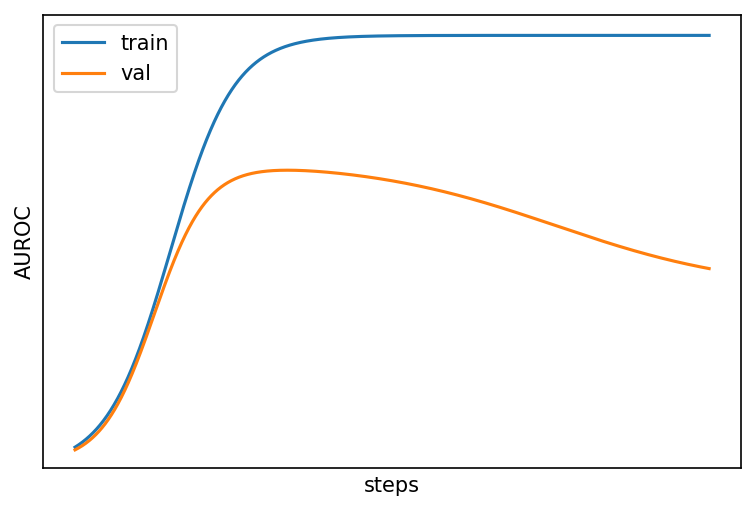

In [7]:
plot_dummy_learning_curves(lambda x: sigmoid(x - 3), lambda x: 0.7 * sigmoid(1.2 * x - 3) + 0.01 - 0.3 * sigmoid(0.33 * x - 5))

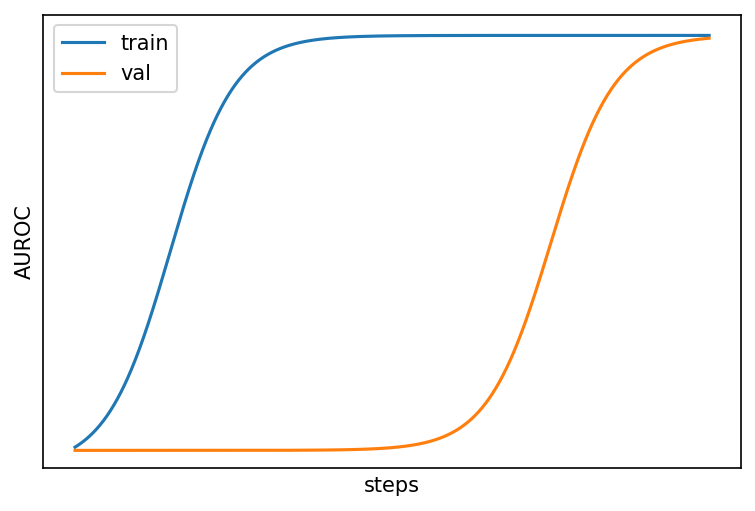

In [8]:
plot_dummy_learning_curves(lambda x: sigmoid(x - 3), lambda x: 0.96 * sigmoid(x - 15) + 0.04)

# Initial observations

## Can also use MLPs

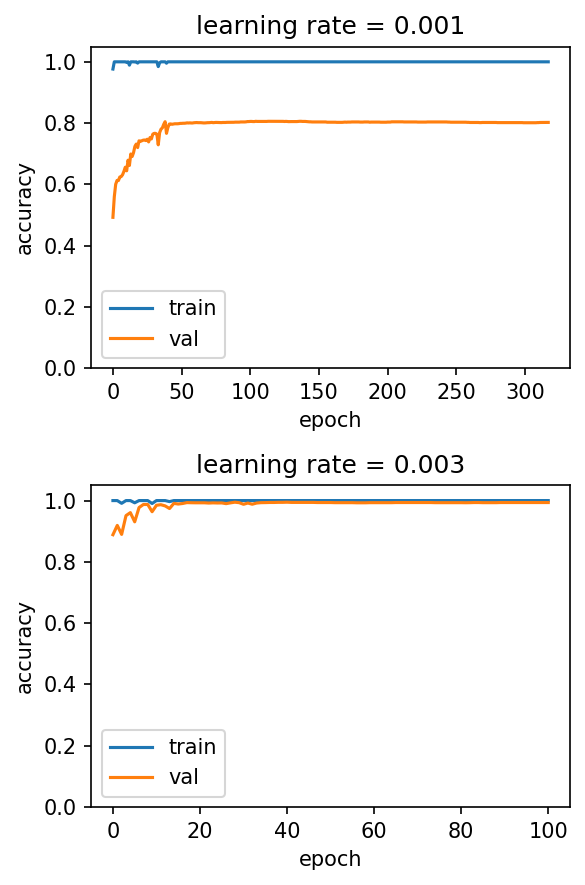

In [9]:
fig, (axt, axb) = plt.subplots(2, 1, figsize=(4, 6), dpi=150)
mlp_signature_run = Run("runs/modadd_tf_50_p_97_w_0_mlp_220824212521/")
mlp_signature_run.learning_curves("sparse_categorical_accuracy", ylim=[0.0, 1.05], ylabel="accuracy", ax=axt)
axt.set_title("learning rate = 0.001")
axt.legend()
mlp_fast_run = Run("runs/modadd_tf_50_p_97_w_0_mlp_lr_0_003_220826112346/")
mlp_fast_run.learning_curves("sparse_categorical_accuracy", ylim=[0.0, 1.05], ylabel="accuracy", ax=axb)
axb.set_title("learning rate = 0.003")
axb.legend()
plt.tight_layout()

## Can achieve same effect faster by other means

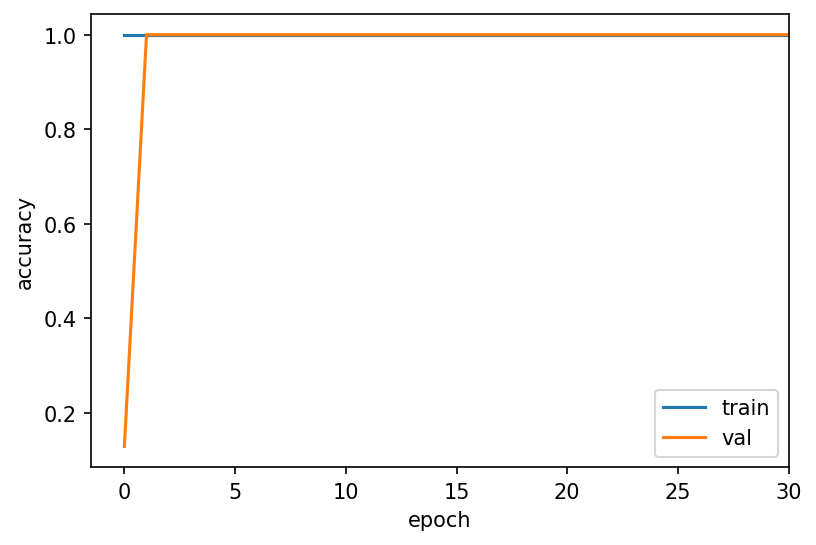

In [10]:
weight_decay_signature_run = Run("runs/moddiv_tf_50_p_97_w_0.001_220826114154/")
weight_decay_signature_run.learning_curves("sparse_categorical_accuracy", ylabel="accuracy", xlim=[None, 30])
plt.legend()

## Some datasets easier to grok than others

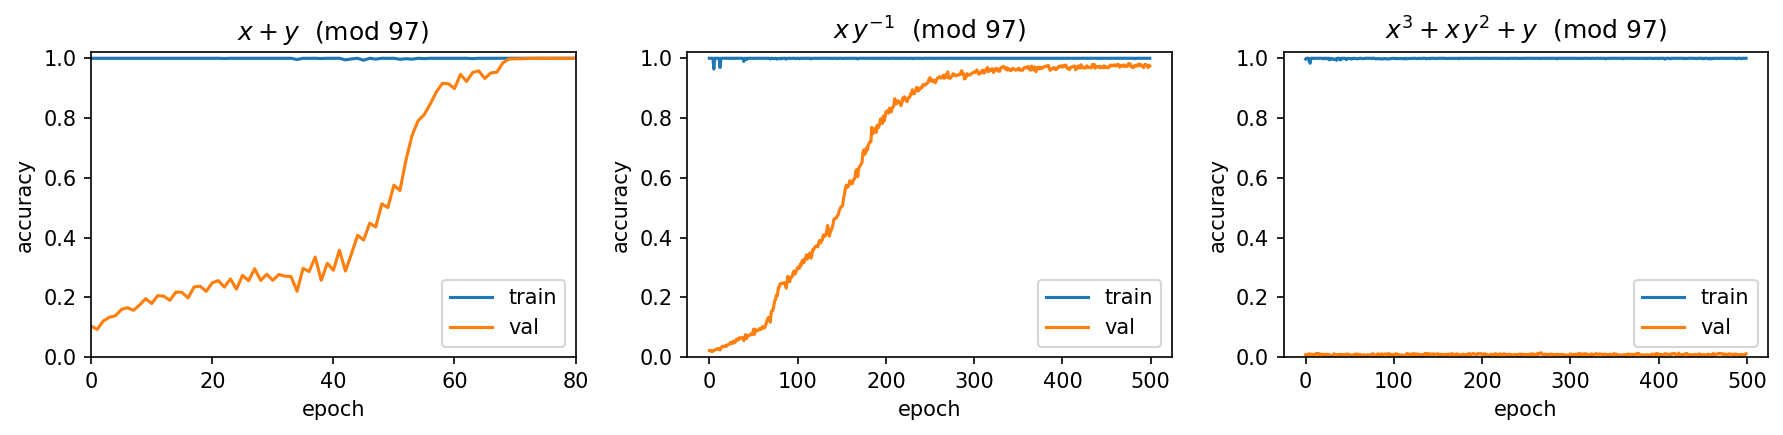

In [11]:
modadd_signature_run = Run("runs/modadd_tf_50_p_97_w_0_220824190920/")
cubicpoly_signagure_run = Run("runs/cubicpoly_tf_80_w_0_220822092116/")
f, (axl, axc, axr) = plt.subplots(1, 3, figsize=(12, 3), dpi=150)
modadd_signature_run.learning_curves("sparse_categorical_accuracy", ylabel="accuracy", xlim=[0, 80], ylim=[0.0, 1.02], ax=axl)
axl.legend(loc="lower right")
axl.set_title("$x + y~~(\mathrm{mod}~97)$")
grokking_signature_run.learning_curves("sparse_categorical_accuracy", ylabel="accuracy", ylim=[0.0, 1.02], ax=axc)
axc.legend(loc="lower right")
axc.set_title("$x\,y^{-1}~~(\mathrm{mod}~97)$")
cubicpoly_signagure_run.learning_curves("sparse_categorical_accuracy", ylabel="accuracy", ylim=[0.0, 1.02], ax=axr)
axr.legend(loc="lower right")
axr.set_title("$x^3 + x\,y^2 + y~~(\mathrm{mod}~97)$")
plt.tight_layout()

## Representation matters

Text(0.5, 1.0, '$x + y~~(\\mathrm{mod}~97)$')

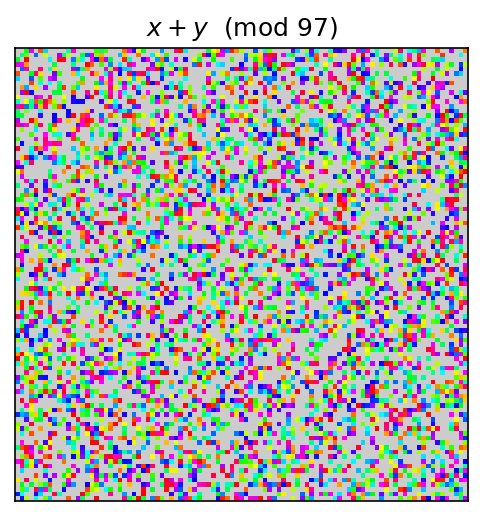

In [21]:
visualise(*modadd_signature_run.train, permute_token_orders=True, rgb_for_missing=(0.8, 0.8, 0.8), seed=42)
plt.title("$x + y~~(\mathrm{mod}~97)$")

Text(0.5, 1.0, '$x + y~~(\\mathrm{mod}~97)$')

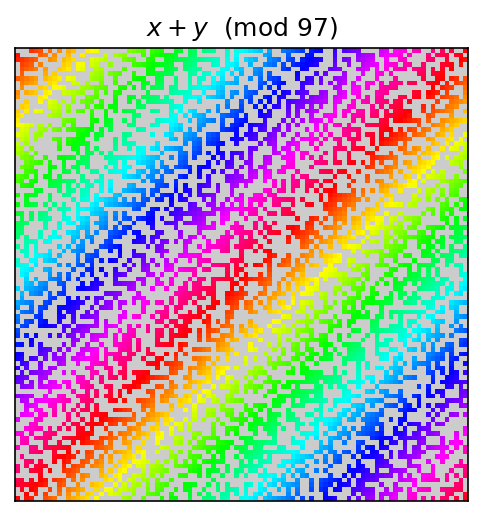

In [20]:
visualise(*modadd_signature_run.train, permute_token_orders=False, rgb_for_missing=(0.8, 0.8, 0.8), seed=42)
plt.title("$x + y~~(\mathrm{mod}~97)$")

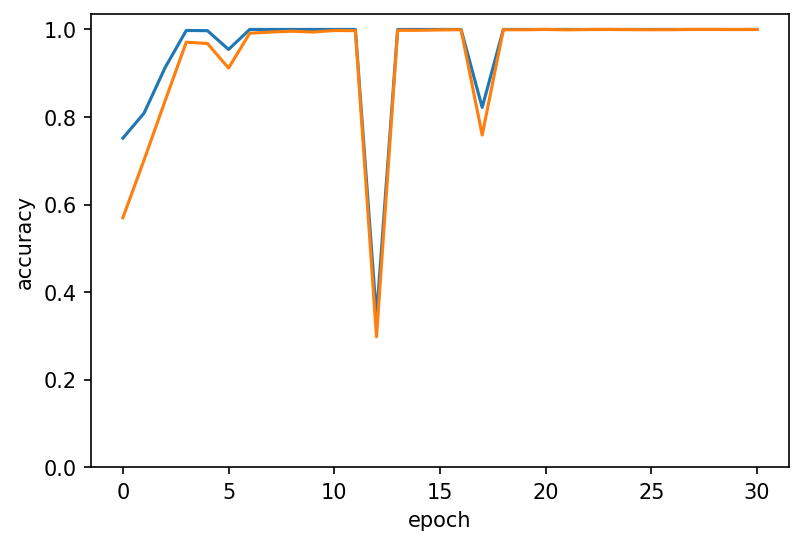

In [41]:
circular_embedding_run = Run("runs/modadd_tf_50_p_97_w_0_lr_0_001_circularembed_220826085333/")
circular_embedding_run.learning_curves("sparse_categorical_accuracy", ylabel="accuracy", ylim=[0, None])

Text(0.5, 1.0, '$x\\,y^{-1}~~(\\mathrm{mod}~97)$')

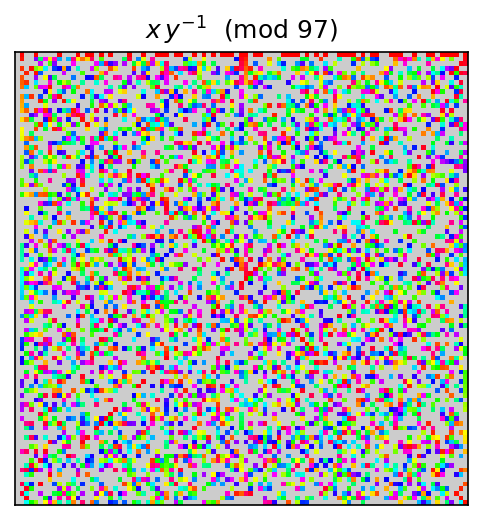

In [35]:
visualise(*grokking_signature_run.train, permute_token_orders=False, rgb_for_missing=(0.8, 0.8, 0.8), seed=42)
plt.title("$x\,y^{-1}~~(\mathrm{mod}~97)$")

Text(0.5, 1.0, '$x^3 + x\\,y^2 + y~~(\\mathrm{mod}~97)$')

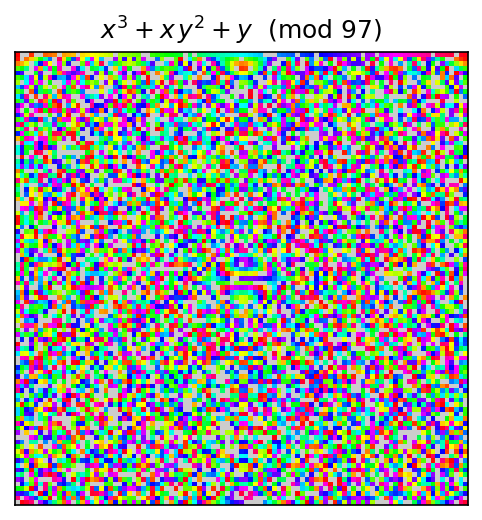

In [36]:
visualise(*cubicpoly_signagure_run.train, permute_token_orders=False, rgb_for_missing=(0.8, 0.8, 0.8), seed=42)
plt.title("$x^3 + x\,y^2 + y~~(\mathrm{mod}~97)$")

In [43]:
!ls -alt runs/

/bin/bash: /home/senthooran/anaconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
total 128
drwxrwxr-x 12 senthooran senthooran 4096 Aug 26 13:58 ..
drwxrwxr-x 32 senthooran senthooran 4096 Aug 26 13:56 .
drwxrwxr-x  4 senthooran senthooran 4096 Aug 26 13:44 modadd_tf_50_p_97_w_0_circularembed_220826134407
drwxrwxr-x  4 senthooran senthooran 4096 Aug 26 11:42 moddiv_tf_50_p_97_w_0.001_220826114154
drwxrwxr-x  4 senthooran senthooran 4096 Aug 26 11:23 modadd_tf_50_p_97_w_0_mlp_lr_0_003_220826112346
drwxrwxr-x  4 senthooran senthooran 4096 Aug 26 11:19 modadd_tf_50_p_97_w_0_mlpbig_220826111937
drwxrwxr-x  4 senthooran senthooran 4096 Aug 26 09:11 cubicpoly_tf_80_p_97_w_0.001_220826091122
drwxrwxr-x  4 senthooran senthooran 4096 Aug 26 09:02 moddiv_tf_50_p_97_w_0_lr_0_001_circularembed_220826090158
drwxrwxr-x  4 senthooran senthooran 4096 Aug 26 08:53 modadd_tf_50_p_97_w_0_lr_0_001_circularembed_220826085333
drwxrwxr-x  4 senthooran senthooran 4096 

In [3]:
locals()["hello"] = 3

In [4]:
modadd_tf_50_p_97_w_0 = Run("runs/modadd_tf_50_p_97_w_0_220824190920/")
modadd_tf_50_p_97_w_0_mlp_lr_0_003 = Run("runs/modadd_tf_50_p_97_w_0_mlp_lr_0.003_220825080120/")
moddiv_tf_50_p_97_w_0 = Run("runs/moddiv_tf_50_w_0_220821200321/")
cubicpoly_tf_80_w_0_run_0 = Run("runs/cubicpoly_tf_80_w_0_220822092116/")
cubicpoly_tf_80_w_0_run_1 = Run("runs/cubicpoly_tf_80_w_0_220822101635/")

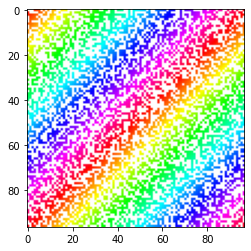

In [5]:
visualise(*modadd_tf_50_p_97_w_0.train, permute_token_orders=False, seed=42)

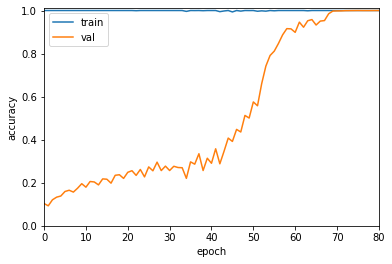

In [8]:
modadd_tf_50_p_97_w_0.learning_curves("sparse_categorical_accuracy", xlim=[0, 80], ylim=[0.0, 1.01], ylabel="accuracy")
plt.legend()

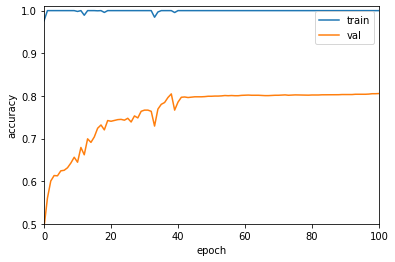

In [50]:
learning_curves(modadd_tf_50_p_97_w_0_mlp.history, "sparse_categorical_accuracy", xlim=[0, 100], ylim=[0.5, 1.01], ylabel="accuracy")
plt.legend()

In [7]:
tf.keras.backend.clear_session()
moddiv_tf_50_w_0_model = moddiv_tf_50_w_0.model_for_epoch(490)
cubicpoly_tf_80_w_0_run_0_model = cubicpoly_tf_80_w_0_run_0.model_for_epoch(490)
cubicpoly_tf_80_w_0_run_1_model = cubicpoly_tf_80_w_0_run_1.model_for_epoch(490)

In [5]:
np.argmax(moddiv_tf_50_w_0_model(moddiv_tf_50_w_0.val[0]).numpy(), axis=-1) == moddiv_tf_50_w_0.val[1]

2022-08-25 14:59:54.221180: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


array([ True,  True,  True, ...,  True,  True,  True])

In [8]:
preds_1 = tf.math.argmax(cubicpoly_tf_80_w_0_run_0_model(cubicpoly_tf_80_w_0_run_0.val[0]), axis=-1)
preds_2 = tf.math.argmax(cubicpoly_tf_80_w_0_run_1_model(cubicpoly_tf_80_w_0_run_1.val[0]), axis=-1)
tf.reduce_mean(tf.cast(preds_1 == preds_2, tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=0.02763018>

In [11]:
from sklearn.manifold import TSNE
moddiv_tf_50_w_0_model.layers[1].get_weights()[0].shape

ModuleNotFoundError: No module named 'sklearn'

In [48]:
moddiv_tf_50_w_0.model.trainable_layers

AttributeError: 'Functional' object has no attribute 'trainable_layers'

/home/senthooran/miniconda3/envs/dl/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


(97, 2)


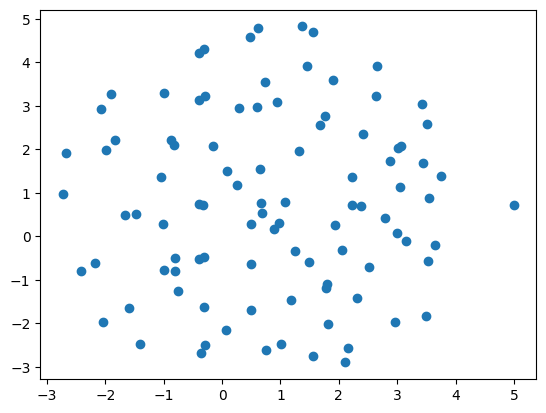

In [60]:
tsne = TSNE(perplexity=30, init="pca", learning_rate="auto")
embedded_vectors = tsne.fit_transform(moddiv_tf_50_w_0.model.trainable_weights[-2].numpy().T)
print(embedded_vectors.shape)
plt.scatter(embedded_vectors[:, 0], embedded_vectors[:, 1])

(97, 2)


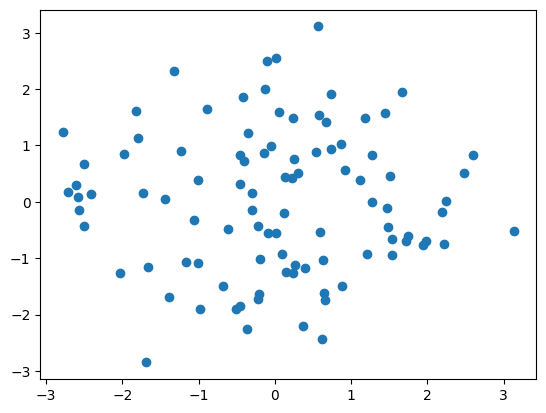

In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
embedded_vectors = pca.fit_transform(moddiv_tf_50_w_0.model.trainable_weights[-2].numpy().T)
print(embedded_vectors.shape)
plt.scatter(embedded_vectors[:, 0], embedded_vectors[:, 1])

In [90]:
with open("runs/220822092116/data/train.json", "r") as f:
    print([np.array(el) for el in json.load(f)])

[array([[14, 42],
       [20, 89],
       [90,  9],
       ...,
       [73, 94],
       [46,  8],
       [ 9, 18]]), array([31, 57, 69, ..., 22, 87, 74])]


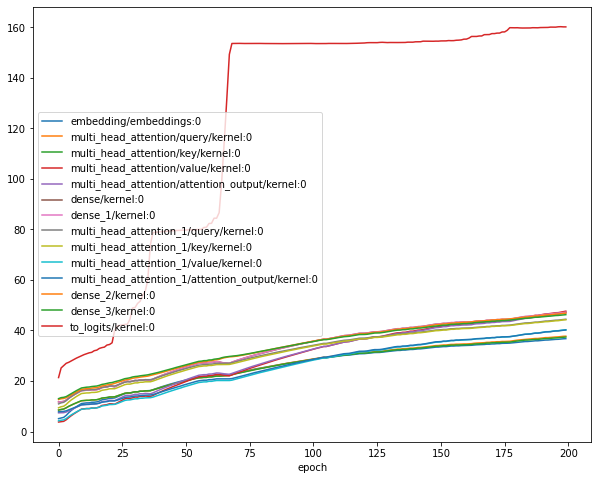

In [66]:
def plot_layer_weight_progression(history):
    layer_names = list(n for n in history.layer_weight_norms[0].keys() if "kernel" in n or "embeddings" in n)
    lwn_history = pd.DataFrame({n: history.layer_weight_norms.str[n] for n in layer_names})
    lwn_history.plot(figsize=(10, 8))
    
plot_layer_weight_progression(history)

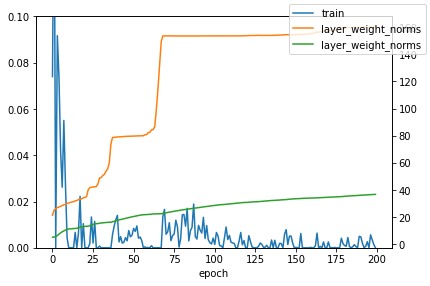

In [38]:
history.train.str["loss"].plot()
plt.ylim([0.0, 0.1])
plt.sca(plt.gca().twinx())
history.layer_weight_norms.str["to_logits/kernel:0"].plot(color="C1")
history.layer_weight_norms.str["embedding/embeddings:0"].plot(color="C2")
plt.gcf().legend()
plt.tight_layout()